In [2]:
import wandb
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from vision_data_engine.utils.general import  get_class_names

In [3]:
sns.set_theme(context="paper", palette="colorblind")
sns.set(font_scale=1.5)

In [8]:
def compute_cross_val(run_paths):
    api = wandb.Api()
    runs_tables = []
    for run_path in run_paths:
        run = api.run(run_path)
        results_artifact = run.logged_artifacts()[0]
        results_table = results_artifact.get("Results Table")
        runs_tables.append(
            pd.DataFrame(results_table.data, columns=results_table.columns)
        )
    mean_res = pd.concat(runs_tables)
    mean_res = mean_res.groupby(mean_res.index).mean()
    mean_res.iloc[:,0:3] = mean_res.iloc[:,0:3].mul(2)
    # sometimes the model doesnt find some classes
    # So, construct table from the most complete list of classes
    class_list = (
        list(runs_tables[1]["Class"])
        if len(runs_tables[1].index) > len(runs_tables[0].index)
        else list(runs_tables[0]["Class"])
    )
    mean_res.insert(0, "Class", class_list)
    return mean_res

names = get_class_names("../yolov7/data/schreder.names")

def plot_results(dfs: list[pd.DataFrame], model_names: list, metric="mAP@.5:.95", save=False):
    df = pd.concat(dfs, keys=model_names, names=["Model"] ).reset_index(level=0)
    # capitalize class names
    df["Class"] = df["Class"].str.capitalize()
    # drop class other
    df = df[df["Class"] != "Other"]
    fig, ax = plt.subplots(1,1, figsize=(16,5))
    sns.barplot(data=df, x="Class", y=metric, hue="Model", ax=ax)
    plt.legend(bbox_to_anchor=(1., 1), loc='upper right', borderaxespad=0)
    ax.set_ylim(top=1.0)
    ax.set_ylabel(metric)
    ax.set_xlabel("")

    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    fig.tight_layout()
    if save:
        fig.savefig("cross_val_vision_per_class.svg", bbox_inches="tight")
    return fig

## Results for vision_1681238204

### Yolov4 finetuned (Yolov7 AP)

In [3]:
compute_cross_val(["magalhaes/Vision/cy1b7y6i", "magalhaes/Vision/m85nkhvr"])

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


,Class,# images,# targets,# predictions,Precision,Recall,mAP@.5,mAP@.5:.95
0,all,7806.0,31037.0,45275.0,0.650445,0.751221,0.714977,0.514123
1,person,7806.0,15006.0,23478.0,0.581907,0.750838,0.697939,0.439155
2,bicycle,7806.0,1634.0,2177.0,0.651951,0.751855,0.720739,0.476411
3,car,7806.0,10753.0,14307.0,0.727276,0.859072,0.840988,0.633500
4,motorcycle,7806.0,1511.0,2186.0,0.610235,0.741816,0.702806,0.432362
5,emergency_vehicle,7806.0,86.0,90.0,0.840501,0.756911,0.773301,0.672700
6,bus,7806.0,1178.0,1511.0,0.727284,0.819116,0.800625,0.639708
7,other,7806.0,13129.0,17448.0,0.399033,0.394722,0.313549,0.181326
8,truck,7806.0,869.0,1526.0,0.413963,0.578939,0.468439,0.305025


### Yolov7 finetuned strong augmentations (Yolov7 AP)

In [4]:
compute_cross_val(["magalhaes/Vision/d9ibc52c", "magalhaes/Vision/xronbi3l"])

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


,Class,# images,# targets,# predictions,Precision,Recall,mAP@.5,mAP@.5:.95
0,all,7805.0,31032.0,40296.0,0.796383,0.670894,0.695187,0.479928
1,person,7805.0,15006.0,20068.0,0.782432,0.640272,0.665044,0.386188
2,bicycle,7805.0,1634.0,2008.0,0.808128,0.692068,0.721646,0.450116
3,car,7805.0,10748.0,13196.0,0.864731,0.795515,0.825014,0.596477
4,motorcycle,7805.0,1511.0,1952.0,0.797090,0.641259,0.676718,0.402602
5,emergency_vehicle,7805.0,86.0,125.0,0.891877,0.721409,0.771251,0.656007
6,bus,7805.0,1178.0,1471.0,0.839307,0.744393,0.767650,0.591932
7,other,7805.0,13129.0,13197.0,0.632247,0.259956,0.269880,0.140761
8,truck,7805.0,869.0,1476.0,0.591117,0.461338,0.438985,0.276171


### Yolov7 finetuned (Yolov7 AP)

In [5]:
compute_cross_val(["magalhaes/Vision/gnc7pyhd", "magalhaes/Vision/87i2wbfm"])

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


,Class,# images,# targets,# predictions,Precision,Recall,mAP@.5,mAP@.5:.95
0,all,7805.0,31032.0,41336.0,0.804807,0.688601,0.708991,0.506534
1,person,7805.0,15006.0,21192.0,0.768846,0.664785,0.689978,0.430187
2,bicycle,7805.0,1634.0,1988.0,0.820741,0.693335,0.715962,0.468030
3,car,7805.0,10748.0,13305.0,0.862280,0.805469,0.832309,0.625408
4,motorcycle,7805.0,1511.0,1860.0,0.817320,0.664488,0.696835,0.429607
5,emergency_vehicle,7805.0,86.0,98.0,0.923021,0.769239,0.788778,0.678849
6,bus,7805.0,1178.0,1354.0,0.869581,0.747268,0.785802,0.626849
7,other,7805.0,13129.0,14340.0,0.619690,0.284362,0.289369,0.167849
8,truck,7805.0,869.0,1539.0,0.571857,0.475621,0.453269,0.286805


### Yolov7 with Yolov4 augmentations

In [4]:
compute_cross_val(["magalhaes/Vision/hofo3erq", "magalhaes/Vision/v0vuisso"])

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


,Class,# images,# targets,# predictions,Precision,Recall,mAP@.5,mAP@.5:.95
0,all,7805.0,31032.0,44233.0,0.797924,0.711427,0.730212,0.525604
1,person,7805.0,15006.0,22616.0,0.763920,0.686062,0.705788,0.445378
2,bicycle,7805.0,1634.0,2188.0,0.804285,0.722009,0.737824,0.482054
3,car,7805.0,10748.0,14293.0,0.846594,0.826383,0.845980,0.639088
4,motorcycle,7805.0,1511.0,2069.0,0.784412,0.699885,0.721849,0.452625
5,emergency_vehicle,7805.0,86.0,90.0,0.956142,0.766938,0.807429,0.705504
6,bus,7805.0,1178.0,1410.0,0.864464,0.773163,0.810282,0.644053
7,other,7805.0,13129.0,16510.0,0.605214,0.307571,0.309495,0.179894
8,truck,7805.0,869.0,1567.0,0.565650,0.505547,0.482329,0.310522


## Results for vision_1684402450

### YOLOv4 finetuned 

In [3]:
compute_cross_val(["magalhaes/Vision/c5kdontb", "magalhaes/Vision/c6t4lnxi"])

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


,Class,# images,# targets,# predictions,Precision,Recall,mAP@.5,mAP@.5:.95
0,all,7849.0,31418.0,45557.0,0.645491,0.744237,0.705052,0.503871
1,person,7849.0,15124.0,23318.0,0.586294,0.751459,0.696363,0.440530
2,bicycle,7849.0,1637.0,2235.0,0.656373,0.770652,0.731209,0.475013
3,car,7849.0,10979.0,14790.0,0.724739,0.865962,0.844357,0.634528
4,motorcycle,7849.0,1528.0,2187.0,0.601464,0.732516,0.696896,0.433802
5,emergency_vehicle,7849.0,87.0,95.0,0.775746,0.709703,0.708942,0.601601
6,bus,7849.0,1186.0,1533.0,0.723891,0.815260,0.786510,0.627760
7,other,7849.0,13130.0,16556.0,0.413616,0.388143,0.308980,0.179289
8,truck,7849.0,877.0,1399.0,0.449934,0.564110,0.471089,0.313859


### YOLOv7-tiny finetuned

In [4]:
compute_cross_val(["magalhaes/Vision/13wcq927", "magalhaes/Vision/nu8odpz9"])

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


,Class,# images,# targets,# predictions,Precision,Recall,mAP@.5,mAP@.5:.95
0,all,7848.0,31413.0,52682.0,0.759222,0.618338,0.644391,0.435029
1,person,7848.0,15124.0,27569.0,0.747781,0.599987,0.636304,0.359606
2,bicycle,7848.0,1637.0,2546.0,0.767134,0.636942,0.670247,0.422098
3,car,7848.0,10974.0,16843.0,0.843928,0.781419,0.811464,0.584350
4,motorcycle,7848.0,1528.0,2410.0,0.771619,0.581775,0.623876,0.349275
5,emergency_vehicle,7848.0,87.0,123.0,0.784283,0.635429,0.654738,0.538734
6,bus,7848.0,1186.0,1563.0,0.828838,0.701541,0.735890,0.557237
7,other,7848.0,13130.0,18021.0,0.562525,0.209505,0.218817,0.110968
8,truck,7848.0,877.0,1628.0,0.570971,0.391274,0.378222,0.233901


### YOLOv7 finetuned

In [5]:
compute_cross_val(["magalhaes/Vision/04e80uai", "magalhaes/Vision/ls69jt20"])

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


,Class,# images,# targets,# predictions,Precision,Recall,mAP@.5,mAP@.5:.95
0,all,7848.0,31413.0,45244.0,0.806984,0.700101,0.727256,0.520813
1,person,7848.0,15124.0,22919.0,0.784876,0.678542,0.712473,0.451098
2,bicycle,7848.0,1637.0,2289.0,0.807647,0.709107,0.741255,0.478277
3,car,7848.0,10974.0,14875.0,0.852818,0.824400,0.850570,0.641252
4,motorcycle,7848.0,1528.0,2105.0,0.799497,0.679341,0.717044,0.448224
5,emergency_vehicle,7848.0,87.0,103.0,0.905785,0.746288,0.779718,0.670706
6,bus,7848.0,1186.0,1441.0,0.853273,0.761810,0.796738,0.633599
7,other,7848.0,13130.0,16353.0,0.631798,0.295169,0.307882,0.178037
8,truck,7848.0,877.0,1512.0,0.644992,0.501220,0.492996,0.322535


### YOLOv7-tiny (distilled) finetuned

In [5]:
compute_cross_val(["magalhaes/Vision/rff54nu0", "magalhaes/Vision/bgaqummb"])

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


,Class,# images,# targets,# predictions,Precision,Recall,mAP@.5,mAP@.5:.95
0,all,7348.0,29671.0,53356.0,0.754196,0.632784,0.662152,0.446141
1,person,7348.0,14596.0,28466.0,0.736851,0.609441,0.647014,0.366584
2,bicycle,7348.0,1486.0,2492.0,0.755680,0.653915,0.670999,0.414542
3,car,7348.0,10053.0,16295.0,0.829121,0.769195,0.804407,0.566273
4,motorcycle,7348.0,1479.0,2484.0,0.747024,0.594115,0.633935,0.358582
5,emergency_vehicle,7348.0,81.0,106.0,0.871986,0.680217,0.748447,0.631586
6,bus,7348.0,1147.0,1655.0,0.812277,0.731566,0.746426,0.560430
7,other,7348.0,13127.0,22345.0,0.545109,0.216965,0.226463,0.114923
8,truck,7348.0,829.0,1858.0,0.526436,0.391041,0.383837,0.224990


In [6]:
dfs = [compute_cross_val(["magalhaes/Vision/c5kdontb", "magalhaes/Vision/c6t4lnxi"]), compute_cross_val(["magalhaes/Vision/04e80uai", "magalhaes/Vision/ls69jt20"]), compute_cross_val(["magalhaes/Vision/13wcq927", "magalhaes/Vision/nu8odpz9"]), compute_cross_val(["magalhaes/Vision/rff54nu0", "magalhaes/Vision/bgaqummb"])]
model_names = ["YOLOv4-CSP", "YOLOv7", "YOLOv7-tiny", "YOLOv7-tiny-distilled"]


wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


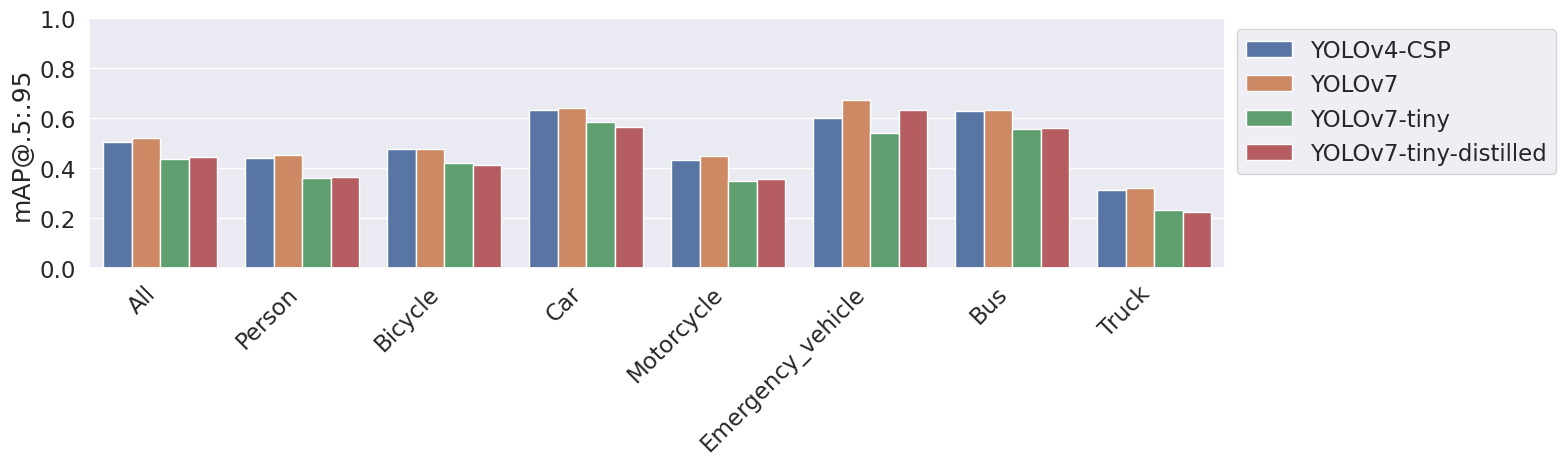

In [9]:
fig = plot_results(dfs, model_names, save=True)
fig.show()

In [ ]:
fig = plot_results(dfs, model_names, save=True)
fig.show()